In [14]:
!pip install pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from csv import writer
from pandas import *
import numpy as np


def plot_running(path: str):
    data = read_csv(path)
    # converting column data to list
    epochs = data['Epoch'].tolist()
    np_epochs = np.arange(1, len(epochs) + 1, 1)
    train_loss = data['Train_loss'].tolist()
    valid_loss = data['Validation_loss'].tolist()
    valid_dice = data['Validation_dice'].tolist()
    learning_rate = data['Learning_rate'].tolist()
    fig, ax = plt.subplots(2, 2)
    ax[0][0].set_title('Train loss')
    ax[0][1].set_title(f'Valid loss')
    ax[1][0].set_title(f'Accuracy')
    ax[1][1].set_title(f'Learning rate')
    ax[0][0].plot(epochs, train_loss)
    ax[0][0].set_xticks(np_epochs)
    ax[0][1].plot(epochs, valid_loss)
    ax[0][1].set_xticks(np_epochs)
    ax[1][0].plot(epochs, valid_dice)
    ax[1][0].set_xticks(np_epochs)
    ax[1][1].plot(epochs, learning_rate)
    ax[1][1].set_xticks(np_epochs)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.savefig(f"{path[:-4]}.png")

TypeError: 'PosixPath' object is not subscriptable

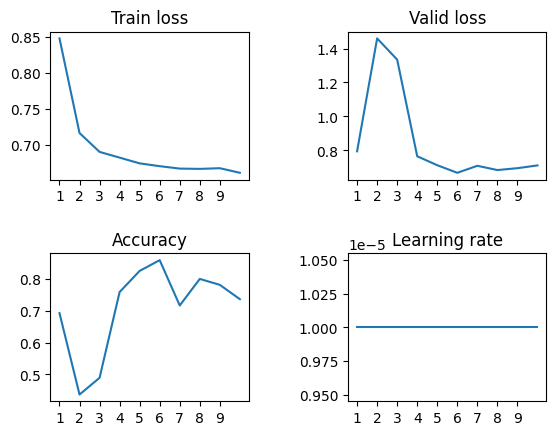

In [13]:
plot_running(str(Path("checkpoints/running.csv")))